In [20]:
# basic-module
# 参考にしたpytorch　tutorialsデータについて
# https://www.softbanktech.co.jp/special/blog/cloud_blog/2019/0036/

"""
事前にde-tasetをダウンロードしておく必要がある。
元画像：https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
アノテーション：https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

これいこについては、googlecolaboratoryにてGPUを利用して実施する予定
"""

import matplotlib.pyplot as plt
import sys,os,re,glob
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.simplefilter('ignore')
from tqdm import tqdm
import seaborn as sns

# deep learning modules 
# imports

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

DHOME="/home/ysorimachi/work/sori_py2/deepl/dat/data/images"
ANNTATION="/home/ysorimachi/work/sori_py2/deepl/dat/data/annotations"

In [5]:
import subprocess 
# subprocess.run(f"ls {DHOME} | wc", shell=True)
_f = os.listdir(DHOME)
print("num_file => ",len(_f))
_f[:10]

num_file =>  7393


['boxer_16.jpg',
 'chihuahua_165.jpg',
 'pug_183.jpg',
 'english_setter_1.jpg',
 'chihuahua_170.jpg',
 'english_cocker_spaniel_17.jpg',
 'samoyed_39.jpg',
 'Egyptian_Mau_62.jpg',
 'samoyed_36.jpg',
 'german_shorthaired_3.jpg']

In [9]:
_cate = sorted(np.unique([ str(f).split("_")[0] for f in _f]))
# _cate
print("cate num -> ", len(_cate))

cate num ->  35


In [11]:
from PIL import Image

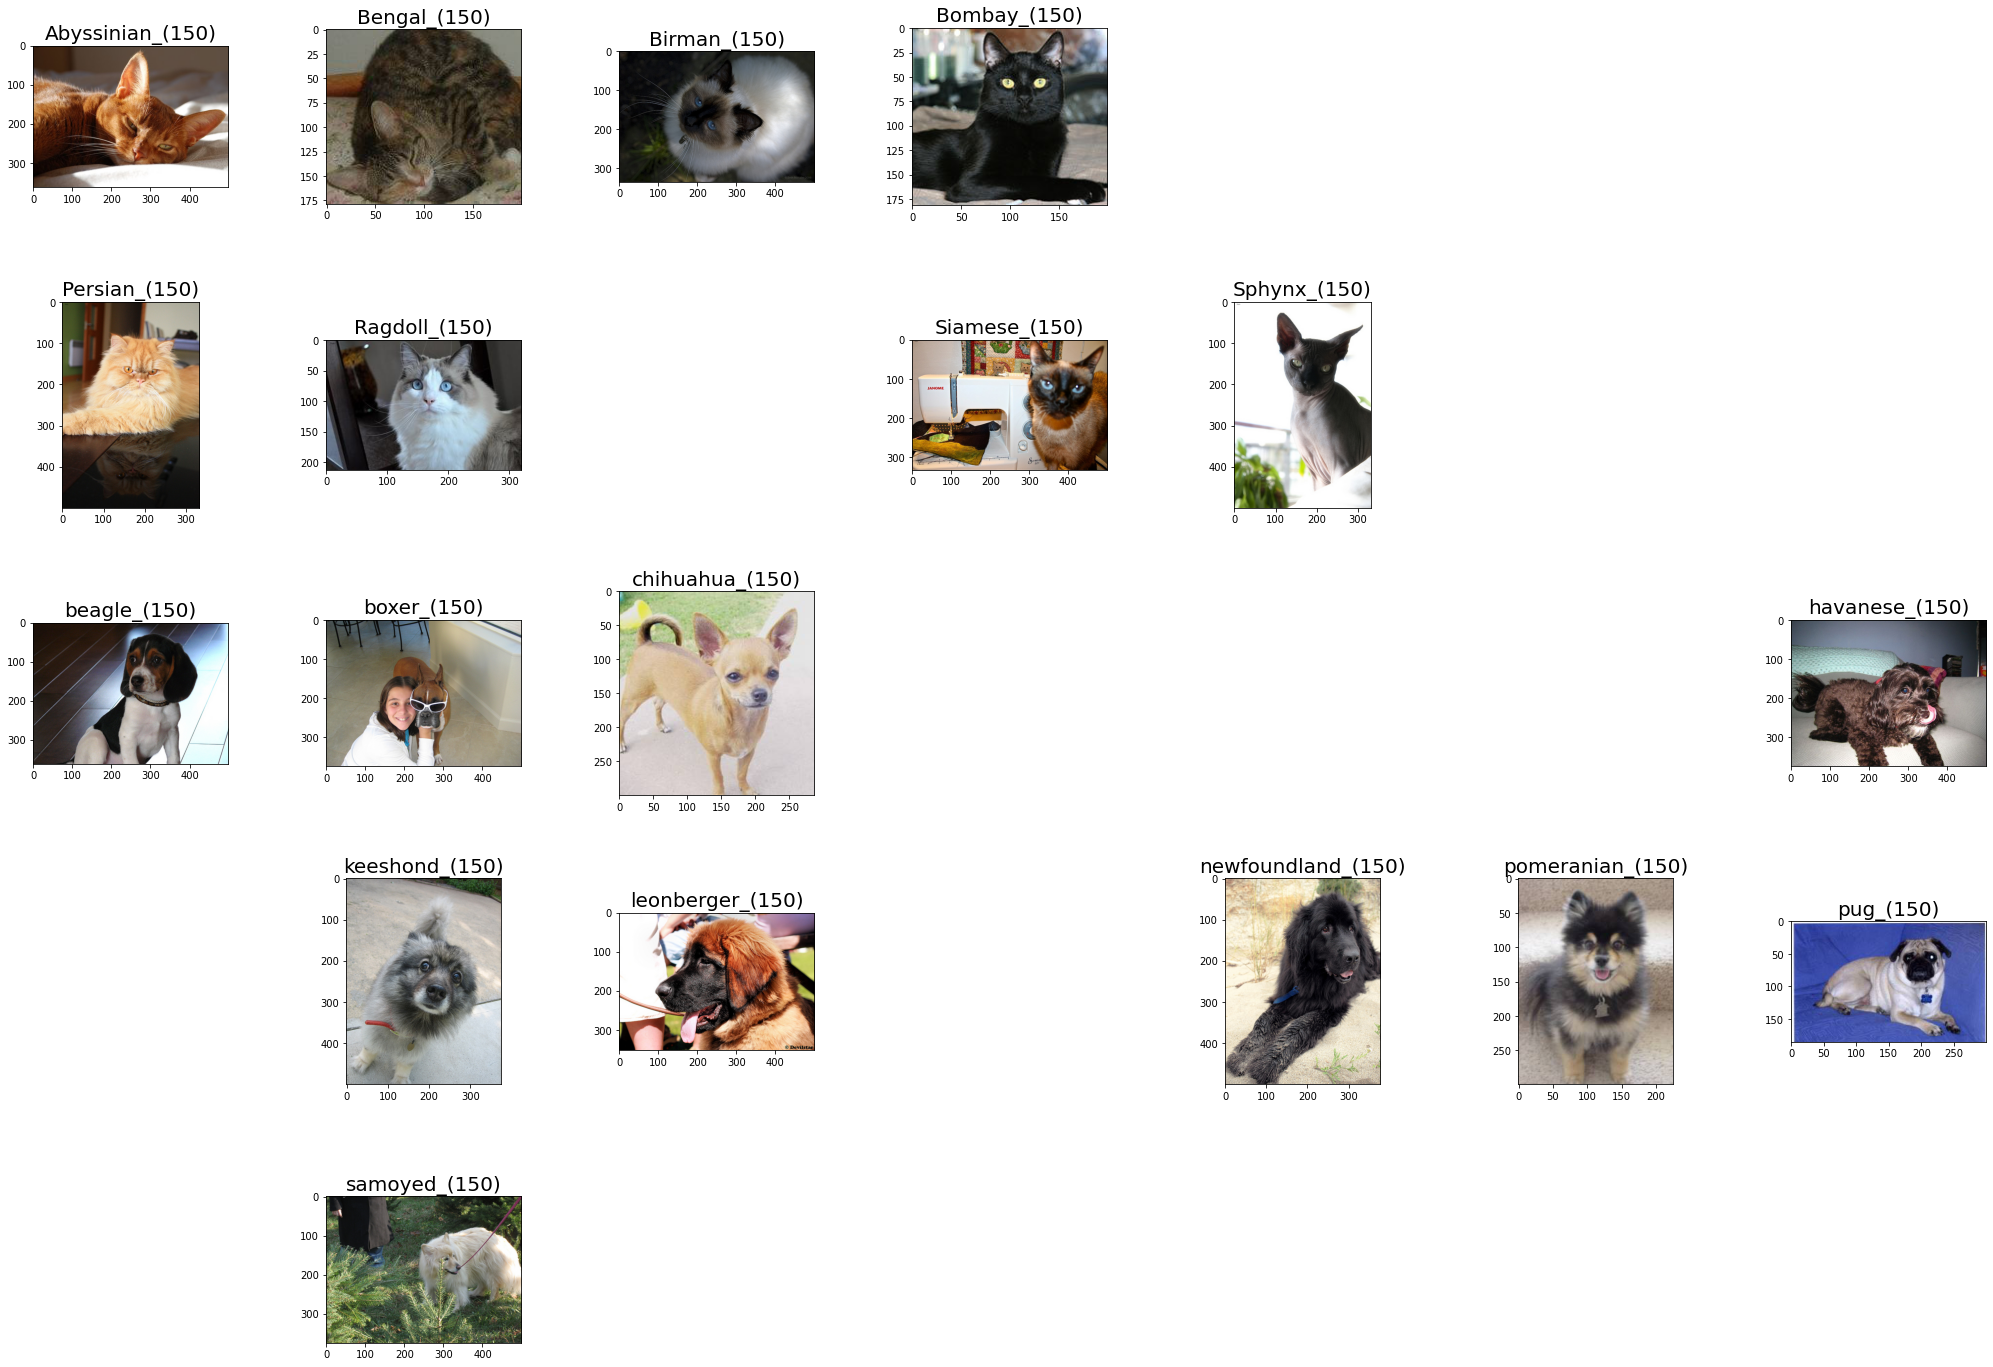

In [19]:
def plot_pic(n=1):
    f,ax = plt.subplots(5,7,figsize=(35,25))
    ax = ax.flatten()
    for i,cate in enumerate(_cate):
        path = f"{DHOME}/{cate}_{n}.jpg"
        if os.path.exists(path):
            img = Image.open(path)
            ax[i].imshow(img)
            ax[i].set_title(f"{cate}_({n})", fontsize=20)
        else:
            ax[i].set_visible(False)
    
    plt.subplots_adjust(hspace=0.4,wspace=0.5)
    plt.show()
    return 


#test
plot_pic(n=150)
# plt.close()

In [21]:
def num_pic():
    N = len(_f)
    for cate in _cate:
        
        pics = sorted(glob.glob(f"{DHOME}/{cate}*.jpg"))
        percent = np.round(len(pics)*100/N,1)
        print(f"{cate} pics -> {len(pics)}/{N} / {percent}%")
    return

num_pic()

Abyssinian pics -> 200/7393 / 2.7%
Bengal pics -> 200/7393 / 2.7%
Birman pics -> 200/7393 / 2.7%
Bombay pics -> 200/7393 / 2.7%
British pics -> 200/7393 / 2.7%
Egyptian pics -> 200/7393 / 2.7%
Maine pics -> 200/7393 / 2.7%
Persian pics -> 200/7393 / 2.7%
Ragdoll pics -> 200/7393 / 2.7%
Russian pics -> 200/7393 / 2.7%
Siamese pics -> 200/7393 / 2.7%
Sphynx pics -> 200/7393 / 2.7%
american pics -> 400/7393 / 5.4%
basset pics -> 200/7393 / 2.7%
beagle pics -> 200/7393 / 2.7%
boxer pics -> 200/7393 / 2.7%
chihuahua pics -> 200/7393 / 2.7%
english pics -> 400/7393 / 5.4%
german pics -> 200/7393 / 2.7%
great pics -> 200/7393 / 2.7%
havanese pics -> 200/7393 / 2.7%
japanese pics -> 200/7393 / 2.7%
keeshond pics -> 200/7393 / 2.7%
leonberger pics -> 200/7393 / 2.7%
miniature pics -> 200/7393 / 2.7%
newfoundland pics -> 200/7393 / 2.7%
pomeranian pics -> 200/7393 / 2.7%
pug pics -> 200/7393 / 2.7%
saint pics -> 200/7393 / 2.7%
samoyed pics -> 200/7393 / 2.7%
scottish pics -> 199/7393 / 2.7%
shi